In [121]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Lendo os arquivos

In [5]:
cafe = pd.read_excel(r"C:\Users\João Vitor\Desktop\econometria\CAFE.xls")
milho = pd.read_excel(r"C:\Users\João Vitor\Desktop\econometria\MILHO.xls")
soja = pd.read_excel(r"C:\Users\João Vitor\Desktop\econometria\SOJA CE.xls")

In [3]:
cafe

,Data,À vista R$,À vista US$
0,02/09/1996,123.09,121.15
1,03/09/1996,119.68,117.69
2,04/09/1996,119.39,117.44
3,05/09/1996,118.42,116.38
4,06/09/1996,118.09,115.98
...,...,...,...
6419,17/06/2022,1326.24,258.02
6420,20/06/2022,1330.45,256.60
6421,21/06/2022,1362.28,264.47
6422,22/06/2022,1388.80,268.63


In [6]:
milho

,Data,À vista R$,À vista US$
0,02/08/2004,18.24,5.98
1,03/08/2004,18.04,5.91
2,04/08/2004,18.02,5.90
3,05/08/2004,18.06,5.89
4,06/08/2004,18.13,5.98
...,...,...,...
4449,17/06/2022,86.32,16.79
4450,20/06/2022,87.42,16.86
4451,21/06/2022,87.15,16.92
4452,22/06/2022,87.04,16.84


In [7]:
soja

,Data,À vista R$,À vista US$
0,29/07/1997,18.04,16.66
1,30/07/1997,17.97,16.59
2,31/07/1997,18.17,16.78
3,01/08/1997,18.10,16.71
4,04/08/1997,18.23,16.83
...,...,...,...
6196,17/06/2022,193.65,37.67
6197,20/06/2022,194.07,37.43
6198,21/06/2022,191.62,37.20
6199,22/06/2022,188.96,36.55


fazendo uma função para pegar os valores da diferença do ln do preço

In [4]:
def transformação(data):
    data = data.iloc[:,:-1]
    data.reset_index(drop = True , inplace=True)
    data.columns = ['Data' , 'preço']
    data['lnpreçod'] = np.log(data['preço']).diff()
    return data

In [10]:
cafet = transformação(cafe)
milhot = transformação(milho)
sojat = transformação(soja)

In [9]:
cafet

,Data,preço,lnpreçod
0,02/09/1996,123.09,NaN
1,03/09/1996,119.68,-0.028094
2,04/09/1996,119.39,-0.002426
3,05/09/1996,118.42,-0.008158
4,06/09/1996,118.09,-0.002791
...,...,...,...
6419,17/06/2022,1326.24,-0.001198
6420,20/06/2022,1330.45,0.003169
6421,21/06/2022,1362.28,0.023643
6422,22/06/2022,1388.80,0.019280


In [11]:
milhot

,Data,preço,lnpreçod
0,02/08/2004,18.24,NaN
1,03/08/2004,18.04,-0.011025
2,04/08/2004,18.02,-0.001109
3,05/08/2004,18.06,0.002217
4,06/08/2004,18.13,0.003868
...,...,...,...
4449,17/06/2022,86.32,0.000811
4450,20/06/2022,87.42,0.012663
4451,21/06/2022,87.15,-0.003093
4452,22/06/2022,87.04,-0.001263


In [12]:
sojat

,Data,preço,lnpreçod
0,29/07/1997,18.04,NaN
1,30/07/1997,17.97,-0.003888
2,31/07/1997,18.17,0.011068
3,01/08/1997,18.10,-0.003860
4,04/08/1997,18.23,0.007157
...,...,...,...
6196,17/06/2022,193.65,-0.001806
6197,20/06/2022,194.07,0.002167
6198,21/06/2022,191.62,-0.012705
6199,22/06/2022,188.96,-0.013979


In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

Função para decomposição

In [270]:
def decomposição(data):
    fig, axes = plt.subplots(4, 1, figsize = (13,10))
    decomp = seasonal_decompose(data['preço'], model="additive", freq = 24) 
    sns.lineplot(x=range(len(data.iloc[:,1])), y=data.iloc[:,1] , ax=axes.reshape(-1)[0])
    sns.lineplot(x=range(len(data.iloc[:,1])), y=decomp.trend , ax=axes.reshape(-1)[1])
    sns.lineplot(x=range(len(data.iloc[:,1])), y=decomp.seasonal , ax=axes.reshape(-1)[2])
    sns.lineplot(x=range(len(data.iloc[:,1])), y=decomp.resid , ax=axes.reshape(-1)[3])

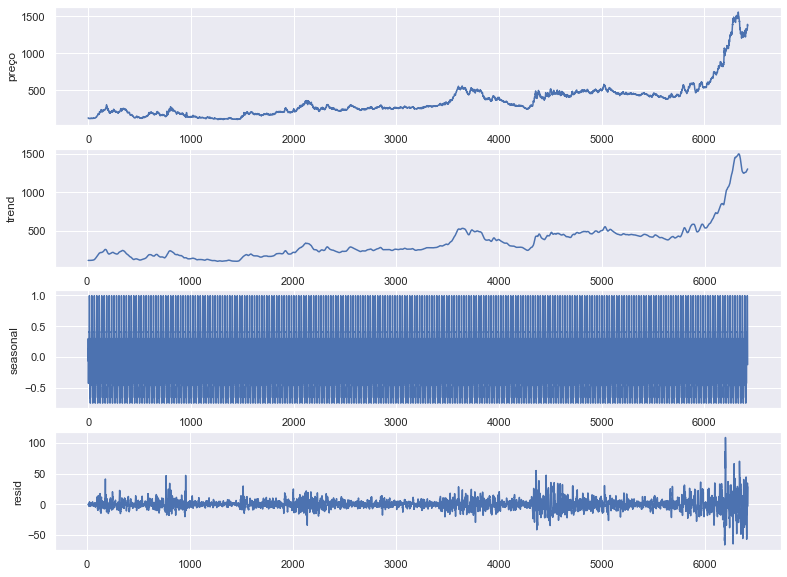

In [271]:
decomposição(cafet)

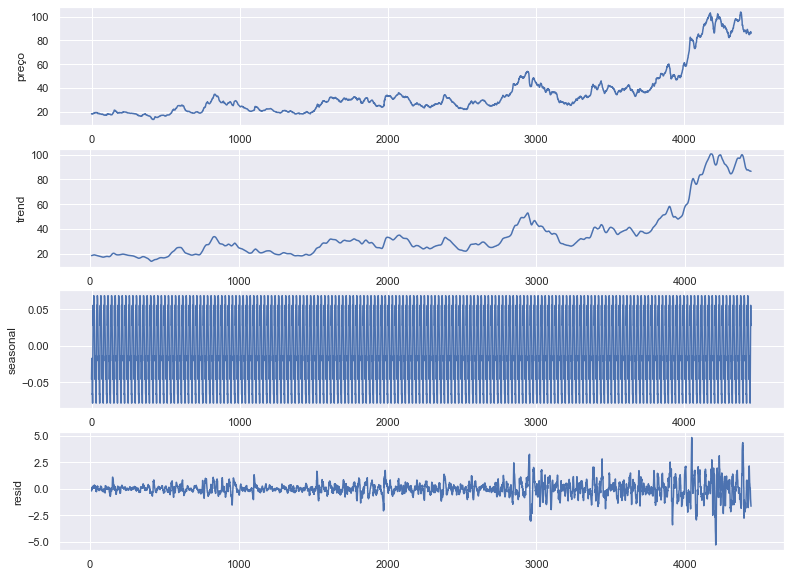

In [272]:
decomposição(milhot)

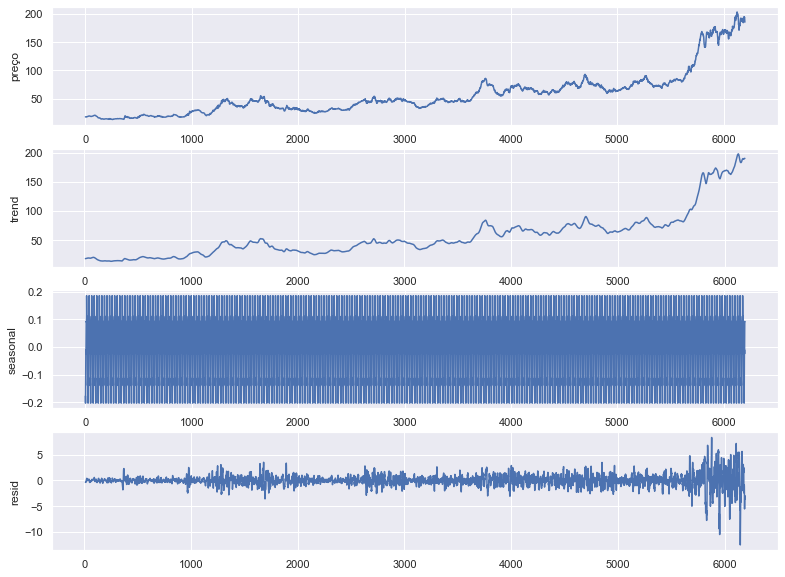

In [273]:
decomposição(sojat)

Pela verificação gráfica, todas séries apresentam uma tendência no seu preço padrão, essa tendência deve ser retirada

In [235]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

Função de autocorrelação e autocorrelação parcial para saber a ordem máxima nos modelos arima

In [236]:
def pacfacf (data):
    plot_acf(data['lnpreçod'][1:]);
    plot_pacf(data['lnpreçod'][1:]);

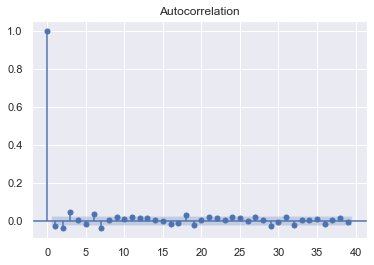

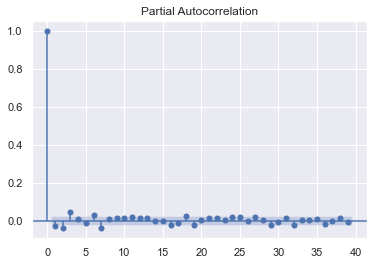

In [237]:
pacfacf(cafet)

Pelo gráfico , a ordem máxima de ar e ma para o retorno do café é 1,1

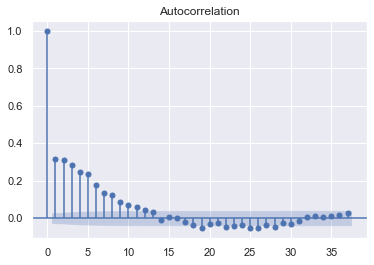

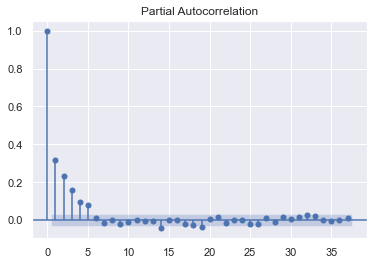

In [238]:
pacfacf(milhot)

Já para o milho se parece mais com um ARMA(5,10) no máximo

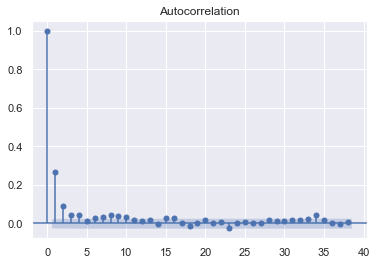

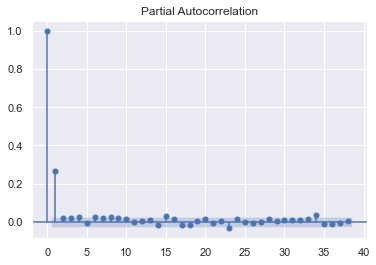

In [239]:
pacfacf(sojat)

(2,2) para a soja

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Função para plotar o preço e o retorno , respectivamente

In [24]:
def timeplot(data):
    fig, axes = plt.subplots(2, 1, figsize = (10,10))
    sns.lineplot(x=range(len(data.iloc[:,1])), y=data.iloc[:,1] , ax=axes.reshape(-1)[0])
    sns.lineplot(x=range(len(data.iloc[1:,2])), y=data.iloc[1:,2] , ax=axes.reshape(-1)[1])

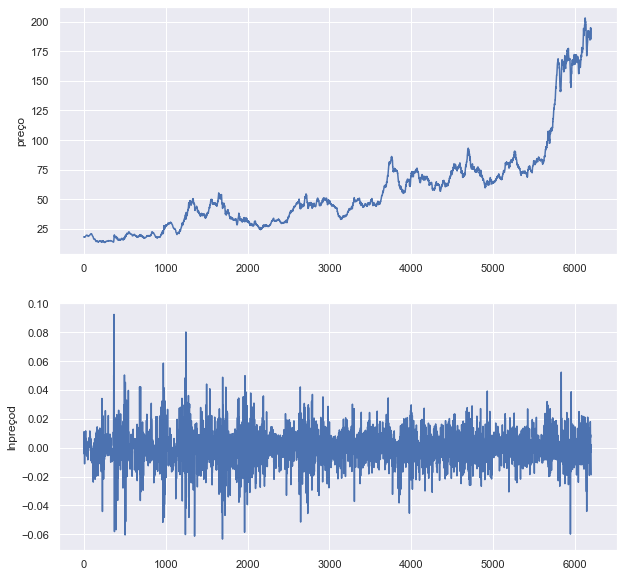

In [25]:
timeplot(sojat)

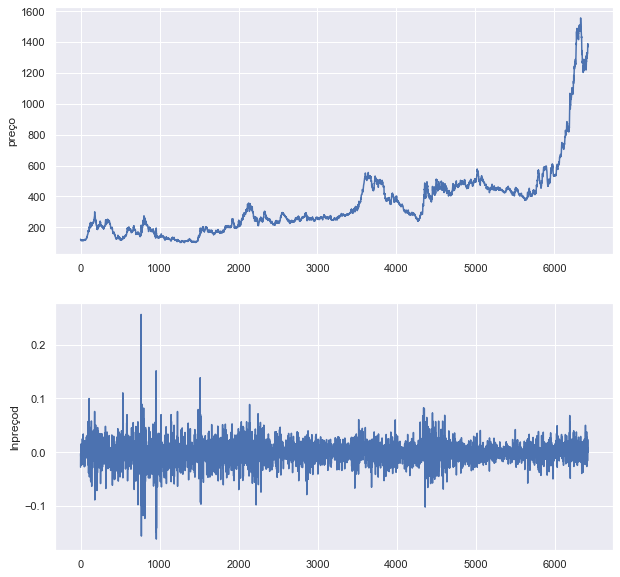

In [26]:
timeplot(cafet)

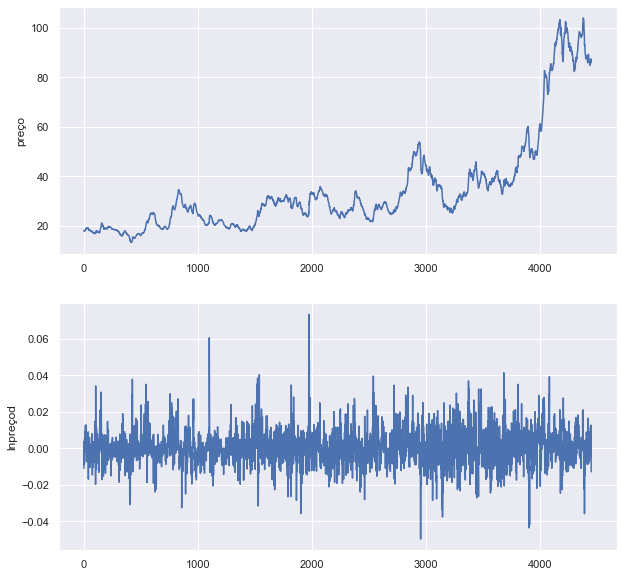

In [27]:
timeplot(milhot)

Pelos gráficos, todas parecem não estácionarias na forma de preço, mas estacionárias no retorno

In [28]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

teste Dickey Fuller e Phillip Perron, os primeiros valores correspondem ao valor estatístico

In [217]:
adfuller(cafet['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-82.51765452476589,
 0.0,
 0,
 6422,
 {'1%': -2.566088234938855,
  '5%': -1.9410419064501716,
  '10%': -1.6167787078783518},
 -32670.78639705034)

In [39]:
PhillipsPerron(cafet['lnpreçod'][1:] , lags = 0)

Test Statistic,-82.545
P-value,0.000
Lags,0


In [218]:
adfuller(milhot['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-48.04573517099135,
 0.0,
 0,
 4452,
 {'1%': -2.5662423842520274,
  '5%': -1.9410605018564169,
  '10%': -1.6167604780624345},
 -29823.69269930097)

In [42]:
PhillipsPerron(milhot['lnpreçod'][1:] , lags = 0)

Test Statistic,-48.096
P-value,0.000
Lags,0


In [219]:
adfuller(sojat['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-59.89340002938606,
 0.0,
 0,
 6199,
 {'1%': -2.566100765461263,
  '5%': -1.9410434170054807,
  '10%': -1.616777224899581},
 -39067.760873978594)

In [44]:
PhillipsPerron(sojat['lnpreçod'][1:] , lags = 0)

Test Statistic,-59.946
P-value,0.000
Lags,0


Todas estatísticas são menores que os valores críticos, ou seja, podemos rejeitar a hipótese nula de raiz unitária e estimar as séries ARMA

In [46]:
from statsmodels.tsa.arima_model import ARIMA

Função que retorna os valores aic e bic

In [114]:
def aicbic(data , ar=0 , ma=0):
    aicbicframe = pd.DataFrame()
    processos = []
    aic = []
    bic = []
    for i in range(ar):
        for k in range(ma):
            try:
                model = ARIMA(data['lnpreçod'][1:],order = (i,0,k)).fit(trend='nc')
                processos.append('ARMA ' + str(i) + ' ' + str(k))
                aic.append(model.aic)
                bic.append(model.bic)
            except:
                processos.append('ARMA ' + str(i) + ' ' + str(k))
                aic.append(np.nan)
                bic.append(np.nan)
    aicbicframe['processos'] = processos
    aicbicframe['aic'] = aic
    aicbicframe['bic'] = bic
    return aicbicframe

Função para estimar ARIMA

In [128]:
def arima(data , ar , ma):
    model = ARIMA(data['lnpreçod'][1:],order = (ar,0,ma)).fit(trend='nc')
    return print(model.summary())

In [115]:
cafeab = aicbic(cafet , 4 , 4)

In [118]:
cafeab.sort_values('aic' , ascending=True)

,processos,aic,bic
10,ARMA 2 2,-32697.462718,-32663.624515
14,ARMA 3 2,-32696.479989,-32655.874145
11,ARMA 2 3,-32696.432552,-32655.826709
12,ARMA 3 0,-32691.671491,-32664.600929
3,ARMA 0 3,-32690.409868,-32663.339306
13,ARMA 3 1,-32689.841304,-32656.003102
7,ARMA 1 3,-32688.762993,-32654.924790
9,ARMA 2 1,-32684.370911,-32657.300348
6,ARMA 1 2,-32682.509316,-32655.438754
8,ARMA 2 0,-32680.238249,-32659.935327


Como a tabela mostra, os valores de aic estão muito próximos, e pela fac e facp, os valores máximos são 1,1. Então, por simplicidade, a estimação será um ARMA(2,1)

In [274]:
arima(cafet , 2,1)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 6423
Model:                     ARMA(2, 1)   Log Likelihood               16346.185
Method:                       css-mle   S.D. of innovations              0.019
Date:                Fri, 01 Jul 2022   AIC                         -32684.371
Time:                        20:02:06   BIC                         -32657.300
Sample:                             0   HQIC                        -32675.002
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod    -0.4144      0.120     -3.442      0.001      -0.650      -0.178
ar.L2.lnpreçod    -0.0568      0.013     -4.544      0.000      -0.081      -0.032
ma.L1.lnpreçod     0.3848      0.120

In [275]:
milhoab = aicbic(milhot , 5 , 10)

In [276]:
milhoab.sort_values('aic' , ascending=True)

,processos,aic,bic
23,ARMA 2 3,-30251.894829,-30213.486829
28,ARMA 2 8,-30251.833939,-30181.419273
32,ARMA 3 2,-30251.806784,-30213.398784
47,ARMA 4 7,-30251.678341,-30174.862341
38,ARMA 3 8,-30251.492796,-30174.676797
22,ARMA 2 2,-30251.022372,-30219.015706
33,ARMA 3 3,-30250.422372,-30205.613039
24,ARMA 2 4,-30250.288098,-30205.478764
42,ARMA 4 2,-30250.199281,-30205.389948
44,ARMA 4 4,-30249.143047,-30191.531048


In [277]:
arima(milhot , 2 , 3)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 4453
Model:                     ARMA(2, 3)   Log Likelihood               15131.947
Method:                       css-mle   S.D. of innovations              0.008
Date:                Fri, 01 Jul 2022   AIC                         -30251.895
Time:                        20:06:04   BIC                         -30213.487
Sample:                             0   HQIC                        -30238.354
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod     1.8035      0.040     44.826      0.000       1.725       1.882
ar.L2.lnpreçod    -0.8253      0.035    -23.709      0.000      -0.894      -0.757
ma.L1.lnpreçod    -1.6225      0.043

In [124]:
sojaab = aicbic(sojat , 4 , 4)

In [125]:
sojaab.sort_values('aic' , ascending=True)

,processos,aic,bic
9,ARMA 2 1,-39087.069966,-39060.140748
14,ARMA 3 2,-39085.325080,-39044.931252
13,ARMA 3 1,-39085.094771,-39051.433249
10,ARMA 2 2,-39085.094309,-39051.432786
11,ARMA 2 3,-39083.379821,-39042.985993
15,ARMA 3 3,-39082.980952,-39035.854820
6,ARMA 1 2,-39079.362112,-39052.432894
5,ARMA 1 1,-39073.669785,-39053.472871
12,ARMA 3 0,-39073.443335,-39046.514117
8,ARMA 2 0,-39073.248488,-39053.051574


In [132]:
arima(sojat , 2, 1)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 6200
Model:                     ARMA(2, 1)   Log Likelihood               19547.535
Method:                       css-mle   S.D. of innovations              0.010
Date:                Fri, 01 Jul 2022   AIC                         -39087.070
Time:                        17:38:10   BIC                         -39060.141
Sample:                             0   HQIC                        -39077.734
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod     1.1793      0.046     25.676      0.000       1.089       1.269
ar.L2.lnpreçod    -0.2235      0.021    -10.694      0.000      -0.265      -0.183
ma.L1.lnpreçod    -0.9211      0.043

# Agora, tentativa de reprodução do trabalho de Walberti Saith e Eder Luís Tomokazu Kamitani

valores tomados de 03/01/2005 até 31/01/2011

In [202]:
def dataj(data):
    return data.iloc[data[data['Data'] == '03/01/2005'].index.values[0]:data[data['Data'] == '31/01/2011'].index.values[0]+1]  

In [209]:
cafej = dataj(cafet)
milhoj = dataj(milhot)
sojaj = dataj(sojat)

In [206]:
cafej

,Data,preço,lnpreçod
2068,03/01/2005,282.71,-0.017045
2069,04/01/2005,278.12,-0.016369
2070,05/01/2005,280.43,0.008271
2071,06/01/2005,276.45,-0.014294
2072,07/01/2005,280.42,0.014259
...,...,...,...
3577,25/01/2011,430.32,-0.013411
3578,26/01/2011,446.96,0.037940
3579,27/01/2011,447.10,0.000313
3580,28/01/2011,453.68,0.014610


In [210]:
milhoj

,Data,preço,lnpreçod
103,03/01/2005,17.03,-0.019768
104,04/01/2005,17.62,0.034058
105,05/01/2005,17.88,0.014648
106,06/01/2005,17.87,-0.000559
107,07/01/2005,17.90,0.001677
...,...,...,...
1610,25/01/2011,31.67,0.009199
1611,26/01/2011,32.05,0.011927
1612,27/01/2011,32.15,0.003115
1613,28/01/2011,32.10,-0.001556


In [211]:
sojaj

,Data,preço,lnpreçod
1843,03/01/2005,32.43,-0.010124
1844,04/01/2005,32.47,0.001233
1845,05/01/2005,32.63,0.004916
1846,06/01/2005,32.74,0.003365
1847,07/01/2005,32.83,0.002745
...,...,...,...
3354,25/01/2011,50.06,-0.001198
3355,26/01/2011,49.37,-0.013879
3356,27/01/2011,49.24,-0.002637
3357,28/01/2011,49.55,0.006276


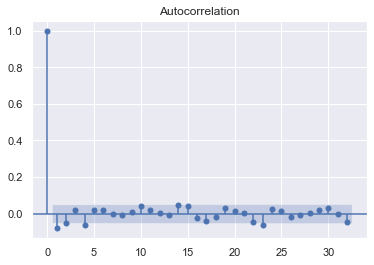

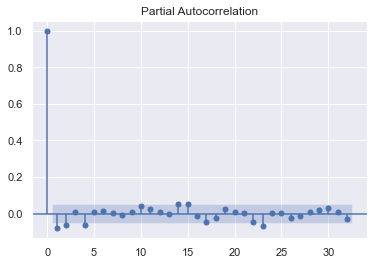

In [240]:
pacfacf(cafej)

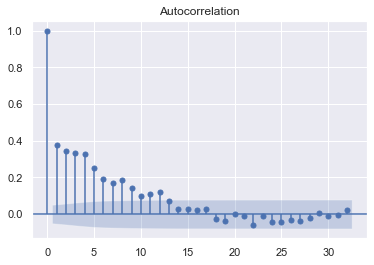

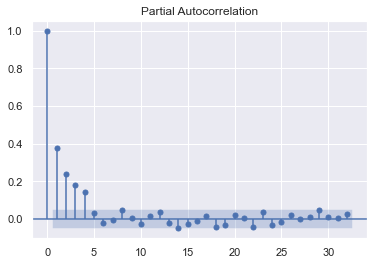

In [241]:
pacfacf(milhoj)

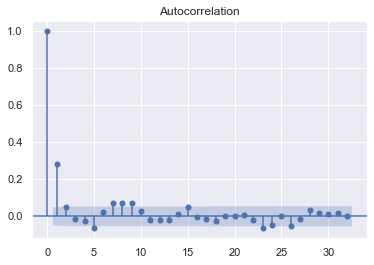

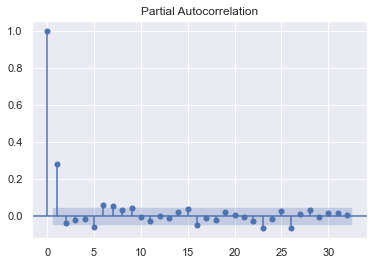

In [242]:
pacfacf(sojaj)

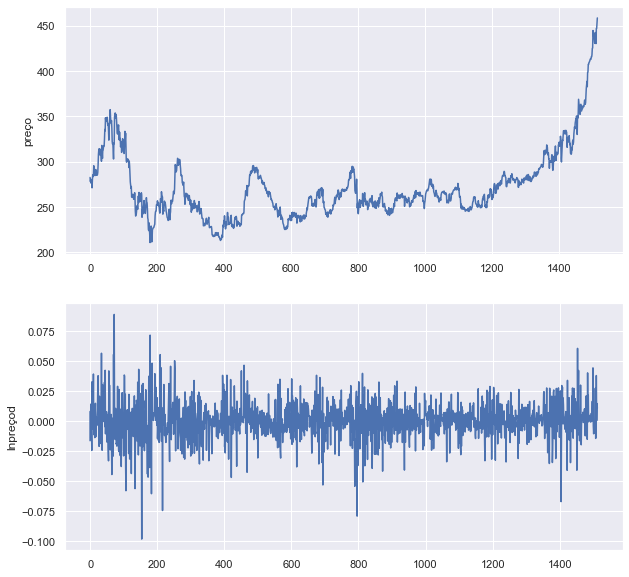

In [207]:
timeplot(cafej)

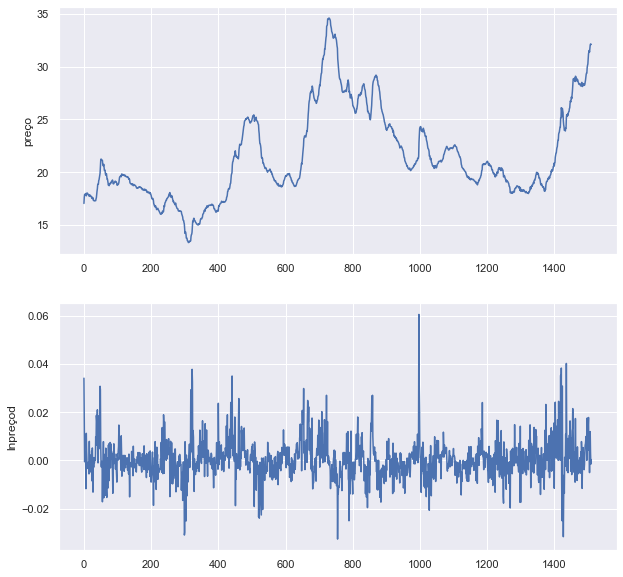

In [212]:
timeplot(milhoj)

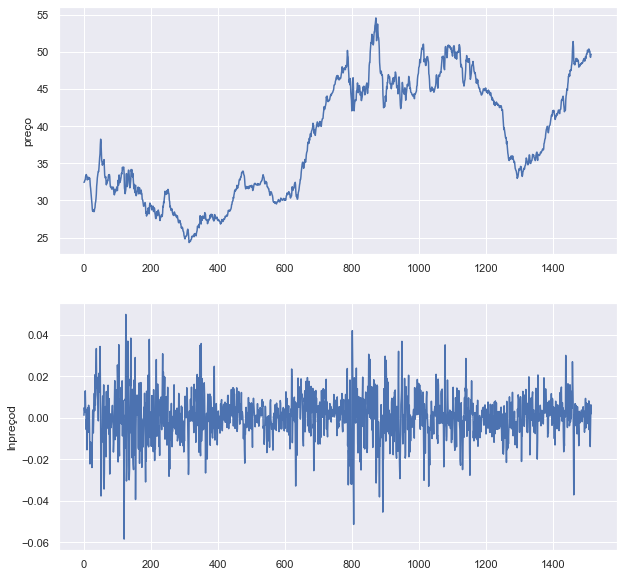

In [213]:
timeplot(sojaj)

In [216]:
adfuller(cafej['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-42.15673851312222,
 0.0,
 0,
 1512,
 {'1%': -2.567220290217939,
  '5%': -1.9411791083806915,
  '10%': -1.6166455184384132},
 -8203.388917424585)

In [215]:
PhillipsPerron(cafej['lnpreçod'][1:] , lags = 0)

Test Statistic,-42.162
P-value,0.000
Lags,0


In [220]:
adfuller(milhoj['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-26.290950539918395,
 0.0,
 0,
 1510,
 {'1%': -2.567222252971361,
  '5%': -1.9411793475384924,
  '10%': -1.6166452888919998},
 -10522.78898437215)

In [221]:
PhillipsPerron(milhoj['lnpreçod'][1:] , lags = 0)

Test Statistic,-26.326
P-value,0.000
Lags,0


In [223]:
adfuller(sojaj['lnpreçod'][1:] , regression = 'nc' , maxlag = 0)

(-29.077741067024036,
 0.0,
 0,
 1514,
 {'1%': -2.5672183326556715,
  '5%': -1.9411788698597967,
  '10%': -1.6166457473824347},
 -9497.471778262978)

In [224]:
PhillipsPerron(sojaj['lnpreçod'][1:] , lags = 0)

Test Statistic,-29.083
P-value,0.000
Lags,0


In [225]:
cafeabjj = aicbic(cafej , 4 , 4)

In [226]:
cafeabjj.sort_values('aic' , ascending=True)

,processos,aic,bic
2,ARMA 0 2,-8210.591886,-8194.626336
9,ARMA 2 1,-8210.417779,-8189.130380
8,ARMA 2 0,-8210.289205,-8194.323656
5,ARMA 1 1,-8209.924658,-8193.959109
10,ARMA 2 2,-8208.962347,-8182.353098
3,ARMA 0 3,-8208.807668,-8187.520269
13,ARMA 3 1,-8208.495309,-8181.886060
12,ARMA 3 0,-8208.428712,-8187.141313
1,ARMA 0 1,-8208.024093,-8197.380394
14,ARMA 3 2,-8207.616538,-8175.685440


In [227]:
arima(cafej , 2 , 2)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 1513
Model:                     ARMA(2, 2)   Log Likelihood                4109.481
Method:                       css-mle   S.D. of innovations              0.016
Date:                Fri, 01 Jul 2022   AIC                          -8208.962
Time:                        18:53:23   BIC                          -8182.353
Sample:                             0   HQIC                         -8199.054
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod    -0.4583      0.279     -1.644      0.100      -1.005       0.088
ar.L2.lnpreçod     0.1586      0.270      0.587      0.558      -0.371       0.689
ma.L1.lnpreçod     0.3756      0.273

In [228]:
milhoabjj = aicbic(milhoj , 4 , 4)

In [230]:
milhoabjj.sort_values('aic' , ascending=True)

,processos,aic,bic
15,ARMA 3 3,-10678.095067,-10640.851378
7,ARMA 1 3,-10670.677173,-10644.074539
14,ARMA 3 2,-10670.305488,-10638.382326
13,ARMA 3 1,-10669.396555,-10642.793920
11,ARMA 2 3,-10669.162557,-10637.239395
10,ARMA 2 2,-10668.528098,-10641.925463
6,ARMA 1 2,-10667.077150,-10645.795042
5,ARMA 1 1,-10666.670284,-10650.708703
9,ARMA 2 1,-10666.650368,-10645.368260
12,ARMA 3 0,-10645.729007,-10624.446900


In [231]:
arima(milhoj , 3 , 3)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 1511
Model:                     ARMA(3, 3)   Log Likelihood                5346.048
Method:                       css-mle   S.D. of innovations              0.007
Date:                Fri, 01 Jul 2022   AIC                         -10678.095
Time:                        19:00:28   BIC                         -10640.851
Sample:                             0   HQIC                        -10664.226
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod     1.1100      0.058     19.242      0.000       0.997       1.223
ar.L2.lnpreçod    -1.1203      0.116     -9.674      0.000      -1.347      -0.893
ar.L3.lnpreçod     0.8185      0.074

In [232]:
sojaabjj = aicbic(sojaj , 4 , 4)

In [233]:
sojaabjj.sort_values('aic' , ascending=True)

,processos,aic,bic
11,ARMA 2 3,-9509.606998,-9477.667974
2,ARMA 0 2,-9502.841732,-9486.872220
4,ARMA 1 0,-9502.650423,-9492.004082
6,ARMA 1 2,-9502.589898,-9481.297215
8,ARMA 2 0,-9502.522527,-9486.553015
5,ARMA 1 1,-9502.255123,-9486.285611
9,ARMA 2 1,-9501.692169,-9480.399486
12,ARMA 3 0,-9501.315668,-9480.022985
3,ARMA 0 3,-9501.087142,-9479.794459
7,ARMA 1 3,-9500.716516,-9474.100662


In [234]:
arima(sojaj , 1 , 0)

                              ARMA Model Results                              
Dep. Variable:               lnpreçod   No. Observations:                 1515
Model:                     ARMA(1, 0)   Log Likelihood                4753.325
Method:                       css-mle   S.D. of innovations              0.010
Date:                Fri, 01 Jul 2022   AIC                          -9502.650
Time:                        19:02:19   BIC                          -9492.004
Sample:                             0   HQIC                         -9498.686
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.lnpreçod     0.2828      0.025     11.482      0.000       0.235       0.331
                                    Roots                                    
                  Real          Imaginary